# Boosting

In [2]:
# Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline


### Import MNIST Train and Test Data

In [3]:
mnist_train_df = pd.read_csv('train.csv', header=None).T
mnist_test_df = pd.read_csv('test.csv', header=None).T
last_column = mnist_test_df.columns[-1]
mnist_train_df.rename(columns={last_column:'Class'}, inplace=True)
mnist_test_df.rename(columns={last_column:'Class'}, inplace=True)

mnist_train_labels = mnist_train_df['Class']
mnist_test_labels = mnist_test_df['Class']

X_mnist_train = mnist_train_df.drop('Class',axis=1)
y_mnist_train = mnist_train_labels

X_mnist_test = mnist_test_df.drop('Class',axis=1)
y_mnist_test = mnist_test_labels
X_mnist_train.shape

(24217, 784)

### Run PCA


In [4]:
pca = PCA(n_components=20)
X_mnist_train_pca = pca.fit_transform(X_mnist_train)
mnist_train_df_pca = pd.DataFrame(X_mnist_train_pca)
mnist_train_df_pca['Class'] = y_mnist_train
X_mnist_train_pca = mnist_train_df_pca.drop('Class',axis=1)


X_mnist_test_pca = pca.fit_transform(X_mnist_test)
mnist_test_df_pca = pd.DataFrame(X_mnist_test_pca)
mnist_test_df_pca['Class'] = y_mnist_test
X_mnist_test_pca = mnist_test_df_pca.drop('Class',axis=1)

## Single iteration of AdaBoost

In [5]:
X = X_mnist_train_pca;    
y = y_mnist_train;
num_iterations = 10;
n, _ = X.shape
K = len(np.unique(y))

### Initialize sample weights

In [6]:
sample_weight = np.empty(X.shape[0], dtype=np.float)
sample_weight[:] = 1. / X.shape[0]  
sample_weight_sum = sample_weight.sum(dtype=np.float64)          

### Fit the decision tree

In [7]:
decision_tree = DecisionTreeClassifier(max_depth=1)
decision_tree.fit(X, y, sample_weight=sample_weight)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Predict

In [8]:
y_pred = decision_tree.predict(X)

### Find incorrectly classified samples.   

In [9]:
misclassified = (y_pred != y)

### Compute Error

In [10]:
err_train = np.average(misclassified, weights=sample_weight, axis=0)
err_train = err_train/sample_weight_sum
print "Iteration#: 1" " Training_error: ", err_train    

Iteration#: 1 Training_error:  0.485485402816


### Compute new alphas given error

In [11]:
alpha = np.log((1 - err_train)/err_train) + np.log(K - 1)


### Update sample weights given alpha and normalize it

In [12]:
for i in range(n):
    if misclassified[i]: 
        sample_weight[i] *= np.exp(alpha)            

# Re-normalize weights
sample_weight_sum = sample_weight.sum(dtype=np.float64)          
sample_weight = sample_weight / sample_weight_sum


### Run n iterations of AdaBoost

In [13]:
X = X_mnist_train_pca;    
y = y_mnist_train;
num_iterations = 10;
n, _ = X.shape
K = len(np.unique(y))
    
errors = np.zeros(num_iterations, dtype=np.float)
    
# Initialize weights to 1 / n_samples
sample_weight = np.empty(X.shape[0], dtype=np.float)
sample_weight[:] = 1. / X.shape[0]  
sample_weight_sum = sample_weight.sum(dtype=np.float64)          

max_depth = 1;

for iteration in range(num_iterations):    
    
    decision_tree = DecisionTreeClassifier(max_depth=max_depth)

    # Fit decision tree
    decision_tree.fit(X, y, sample_weight=sample_weight)
    y_pred = decision_tree.predict(X)
        
    # Find incorrectly classified samples.   
    misclassified = (y_pred != y)
        
    # Error
    err_train = np.average(misclassified, weights=sample_weight, axis=0)
    err_train = err_train/sample_weight_sum
    print "Iteration#: ",iteration, " Training_error: ", err_train    
      
    # Boost weight using AdaBoost SAMME algo
    alpha = np.log((1 - err_train)/err_train) + np.log(K - 1)
        
    # Set sample weight
    for i in range(n):
        if misclassified[i]: 
            sample_weight[i] *= np.exp(alpha)            

    # Re-normalize weights
    sample_weight_sum = sample_weight.sum(dtype=np.float64)          
    sample_weight = sample_weight / sample_weight_sum
        
    errors[iteration] = err_train  

Iteration#:  0  Training_error:  0.485485402816
Iteration#:  1  Training_error:  0.191617890186
Iteration#:  2  Training_error:  0.0753514962347
Iteration#:  3  Training_error:  0.0201957735387
Iteration#:  4  Training_error:  0.00902244705979
Iteration#:  5  Training_error:  0.00205715461567
Iteration#:  6  Training_error:  0.000186854815912
Iteration#:  7  Training_error:  0.000140170233029
Iteration#:  8  Training_error:  2.01682501807e-05
Iteration#:  9  Training_error:  4.56990265033e-06


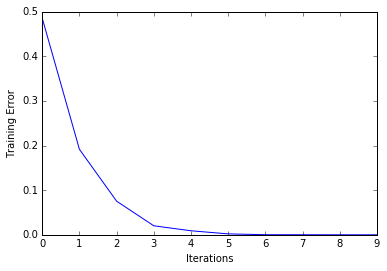

In [14]:
err_plot = plt.plot(errors)
plt.ylabel('Training Error');
plt.xlabel('Iterations')
plt.show()


In [15]:
 
errors_depth_10 = np.zeros(num_iterations, dtype=np.float)
    
# Initialize weights to 1 / n_samples
sample_weight = np.empty(X.shape[0], dtype=np.float)
sample_weight[:] = 1. / X.shape[0]  
sample_weight_sum = sample_weight.sum(dtype=np.float64)          

max_depth = 10;

for iteration in range(num_iterations):    
    
    decision_tree = DecisionTreeClassifier(max_depth=max_depth)

    # Fit decision tree
    decision_tree.fit(X, y, sample_weight=sample_weight)
    y_pred = decision_tree.predict(X)
        
    # Find incorrectly classified samples.   
    misclassified = (y_pred != y)
        
    # Error
    err_train = np.average(misclassified, weights=sample_weight, axis=0)
    err_train = err_train/sample_weight_sum
    print "Iteration#: ",iteration, " Training_error: ", err_train    
      
    # Boost weight using AdaBoost SAMME algo
    alpha = np.log((1 - err_train)/err_train) + np.log(K - 1)
        
    # Set sample weight
    for i in range(n):
        if misclassified[i]: 
            sample_weight[i] *= np.exp(alpha)            

    # Re-normalize weights
    sample_weight_sum = sample_weight.sum(dtype=np.float64)          
    sample_weight = sample_weight / sample_weight_sum
        
    errors_depth_10[iteration] = err_train  

Iteration#:  0  Training_error:  0.0378246686212
Iteration#:  1  Training_error:  0.0174518593615
Iteration#:  2  Training_error:  0.00239955869325
Iteration#:  3  Training_error:  0.000983775958867
Iteration#:  4  Training_error:  6.01261614317e-05
Iteration#:  5  Training_error:  1.09269028786e-05
Iteration#:  6  Training_error:  1.55905153165e-06
Iteration#:  7  Training_error:  2.82827432773e-07
Iteration#:  8  Training_error:  1.47849714367e-08
Iteration#:  9  Training_error:  4.84757817525e-09


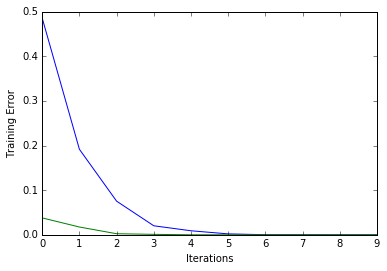

In [16]:
error1 = plt.plot(errors, label='Depth=1');
error2 = plt.plot(errors_depth_10, label='Depth=10');
plt.ylabel('Training Error');
plt.xlabel('Iterations')
plt.show()

# Office dataset

### Import Office Train and Test Data

In [17]:
office_train_df = pd.read_csv('office_train.csv', header=None)
office_test_df = pd.read_csv('office_test.csv', header=None)
label = office_test_df.columns[-1]
segment = office_test_df.columns[-2]
image = office_test_df.columns[-3]
office_train_df.rename(columns={label:'Class', segment: 'Segment', image:'Image' }, inplace=True)
office_test_df.rename(columns={label:'Class', segment: 'Segment', image:'Image'}, inplace=True)

office_test_labels = office_test_df['Class']
X_office_train = office_train_df.drop(['Class','Segment','Image'] ,axis=1)
y_office_train  = office_train_df['Class']
X_office_test = office_test_df.drop(['Class','Segment','Image'] ,axis=1)
y_office_test  = office_test_df['Class']                              

### Run PCA


In [18]:
pca = PCA(n_components=20)
X_office_train_pca = pca.fit_transform(X_office_train)
office_train_df_pca = pd.DataFrame(X_office_train_pca)
office_train_df_pca['Class'] = y_office_train
X_office_train_pca = office_train_df_pca.drop('Class',axis=1)


X_office_test_pca = pca.fit_transform(X_office_test)
office_test_df_pca = pd.DataFrame(X_office_test_pca)
office_test_df_pca['Class'] = y_office_test
X_office_test_pca = office_test_df_pca.drop('Class',axis=1)

### Run n iterations of AdaBoost

In [28]:
X = X_office_train_pca;    
y = y_office_train;
num_iterations = 10;
n, _ = X.shape
K = len(np.unique(y))
    
errors = np.zeros(num_iterations, dtype=np.float)
errors_test = np.zeros(num_iterations, dtype=np.float)

# Initialize weights to 1 / n_samples
sample_weight = np.empty(X.shape[0], dtype=np.float)
sample_weight[:] = 1. / X.shape[0]  
sample_weight_sum = sample_weight.sum(dtype=np.float64)          

max_depth = 1;

for iteration in range(num_iterations):    
    
    decision_tree = DecisionTreeClassifier(max_depth=max_depth)

    # Fit decision tree
    decision_tree.fit(X, y, sample_weight=sample_weight)
    y_pred = decision_tree.predict(X)
        
    # Find incorrectly classified samples.   
    misclassified = (y_pred != y)
        
    # Error
    err_train = np.average(misclassified, weights=sample_weight, axis=0)
    err_train = err_train/sample_weight_sum
    print "Iteration#: ",iteration, " Training_error: ", err_train,
    
        # Test Error
    y_pred_test = decision_tree.predict(X_office_test_pca);
    misclassified_test = (y_pred_test != y_office_test);
    err_test = misclassified_test.sum()*1.0/y_office_test.shape[0];
    print " Test_error: ", err_test

      
    # Boost weight using AdaBoost SAMME algo
    alpha = np.log((1 - err_train)/err_train) + np.log(K - 1)
        
    # Set sample weight
    for i in range(n):
        if misclassified[i]: 
            sample_weight[i] *= np.exp(alpha)            

    # Re-normalize weights
    sample_weight_sum = sample_weight.sum(dtype=np.float64)          
    sample_weight = sample_weight / sample_weight_sum
        
    errors[iteration] = err_train  
    errors_test[iteration] = err_test

Iteration#:  0  Training_error:  0.440929181946  Test_error:  0.422842727905
Iteration#:  1  Training_error:  0.0683297746909  Test_error:  0.873579215959
Iteration#:  2  Training_error:  0.00435119961606  Test_error:  0.94537230341
Iteration#:  3  Training_error:  0.000241296554863  Test_error:  0.980804917653
Iteration#:  4  Training_error:  1.26088887422e-05  Test_error:  0.971555323591
Iteration#:  5  Training_error:  6.31545833728e-07  Test_error:  0.562630480167
Iteration#:  6  Training_error:  4.23154944538e-08  Test_error:  0.771021804686
Iteration#:  7  Training_error:  2.29052539004e-09  Test_error:  0.99272210624
Iteration#:  8  Training_error:  1.32385680446e-10  Test_error:  0.97187427511
Iteration#:  9  Training_error:  6.98961274146e-12  Test_error:  0.992316167942


In [29]:
errors_depth_10 = np.zeros(num_iterations, dtype=np.float)
errors_test_depth_10 = np.zeros(num_iterations, dtype=np.float)

# Initialize weights to 1 / n_samples
sample_weight = np.empty(X.shape[0], dtype=np.float)
sample_weight[:] = 1. / X.shape[0]  
sample_weight_sum = sample_weight.sum(dtype=np.float64)          

max_depth = 10;

for iteration in range(num_iterations):    
    
    decision_tree = DecisionTreeClassifier(max_depth=max_depth)

    # Fit decision tree
    decision_tree.fit(X, y, sample_weight=sample_weight)
    y_pred = decision_tree.predict(X)
        
    # Find incorrectly classified samples.   
    misclassified = (y_pred != y)
        
    # Error
    err_train = np.average(misclassified, weights=sample_weight, axis=0)
    err_train = err_train/sample_weight_sum
    print "Iteration#: ",iteration, " Training_error: ", err_train,    
      
    # Test Error
    y_pred_test = decision_tree.predict(X_office_test_pca);
    misclassified_test = (y_pred_test != y_office_test);
    err_test = misclassified_test.sum()*1.0/y_office_test.shape[0];
    print " Test_error: ", err_test

    # Boost weight using AdaBoost SAMME algo
    alpha = np.log((1 - err_train)/err_train) + np.log(K - 1)
        
    # Set sample weight
    for i in range(n):
        if misclassified[i]: 
            sample_weight[i] *= np.exp(alpha)            

    # Re-normalize weights
    sample_weight_sum = sample_weight.sum(dtype=np.float64)          
    sample_weight = sample_weight / sample_weight_sum
        
    errors_depth_10[iteration] = err_train  
    errors_test_depth_10[iteration] = err_test

Iteration#:  0  Training_error:  0.333496005243  Test_error:  0.5320401299
Iteration#:  1  Training_error:  0.0353139515369  Test_error:  0.830056831362
Iteration#:  2  Training_error:  0.00231235322109  Test_error:  0.85751565762
Iteration#:  3  Training_error:  0.000139293960229  Test_error:  0.787433310137
Iteration#:  4  Training_error:  6.74238070878e-06  Test_error:  0.671624913013
Iteration#:  5  Training_error:  3.07721134137e-07  Test_error:  0.77693690559
Iteration#:  6  Training_error:  1.35408633339e-08  Test_error:  0.727122477383
Iteration#:  7  Training_error:  7.45663580583e-10  Test_error:  0.674756437022
Iteration#:  8  Training_error:  1.2594509562e-11  Test_error:  0.801061238692
Iteration#:  9  Training_error:  1.23722614242e-12  Test_error:  0.88868591974


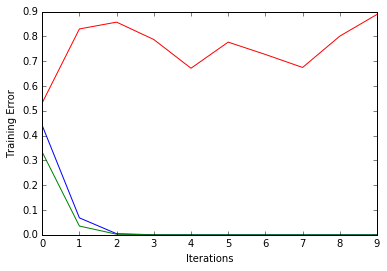

In [33]:
error1 = plt.plot(errors, label='Depth=1');
error2 = plt.plot(errors_depth_10, label='Depth=10');
#error3 = plt.plot(errors_test, label='Depth=1');
error4 = plt.plot(errors_test_depth_10, label='Depth=10');

plt.ylabel('Training Error');
plt.xlabel('Iterations')
plt.show()